<a href="https://colab.research.google.com/github/CherylTutupoly/DLTM4-/blob/main/Shoe%F0%9F%A5%BEBrand%F0%9F%91%9EClassification%F0%9F%91%9F%7CNike_Adidas_Converse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'inceptionv3:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F6306%2F9901%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240504%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240504T084958Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D98c03e5d76147dadf3439c5717fbdf4474b4d94ebed8fa5af5c45b0f05455892d5bca6500d9a206b33feaaf9dfa502fa219b3f6339353e102e1aa07f5b4bf80d6a2cefcc45155371686c90fec1896a731263ad1a8cceacdbd5b7f423b182d064d5b1aba4cf893474532ce4e35a638061df3e3dbd9c160eab873748ab5ea8e4476ab9fde20555b38bbdd2d2e12c82134137c6408e2932d8205e0ade51777f3262cadf4a3b6bcd88b6e266bcf61900ad1bb2dcb090e7d1db4d9e836af89d7e78935272fb14e7122139e0019f4cf61fb8147fba2e02eb9a51c559a57edb491bdc51e23b8764b714312d3241791ce4a49a4cef48f14395bac81d896fe7e793462cff,nike-adidas-shoes-for-image-classification-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2361804%2F3980041%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240504%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240504T084958Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D42e6ebfdca9ed4b6ec3c9b244bb5390fd200821495a4a2137ce1b313e943ece7bc2dfd8d3350fe9eccb421a99cc079fef596ba1d53b96de510953f42f357615795f4af0950b7c1f4eb5862dfb063d8f5a54a168c451e6fcff85c52225248cfb30094ea2bc26f482bb9195390163ce97f6a6179c3c2413de29cb8847c493c92a34dd061341821a18076a5d0297c9b4dbe67127455d1f678b9a0bd5c6c082e21be6697d839ae898a931098f568771a0c01ea6049498d92de5af4ee3e3d0ccd91c921d074737e16b84bb00d90ba981afaa6382ebccc3d9e39b5c485253f09d84c095ccefeddd3d5143b64e7f931804fd638c00ec8d8f10af33930b28e664ac78a34,nike-adidas-and-converse-imaged:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2385323%2F4025361%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240504%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240504T084958Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8c0b004b9c80113c34fe2c00e5f4ac94beabcdd951cc3e5dcdb74876a73e7b8a7b1b1eed8f7e78151d96bc8f7a1616835fbbf7c716432827f9a74c00685a94958f8129ca931cb585a9931ee67faf6614d4dea299f7357959fb8aeb893a23d9515317d93455abf6f2d01b113116e90b13068b7ddb3351f844348e03f13ecda46e583af21caca7a3529035271d496a5fa3eea2b1d864728769d103c062923e89cb9defd3dc7ad8c3e02644ff914a00ff1f37ed82cef900af83ce00c16190cfea9b6979b5529ff875f1454332f8630316bba78592d9c76cf4c4f4f8cacf197ba4546b3109c0914b096c3fee81bfbbf2867ec9654a998876add4cfb9640ad1d2a9c2'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 169717474 bytes downloaded
Downloaded and uncompressed: inceptionv3
[==================================================] 26931150 bytes downloaded
Downloaded and uncompressed: nike-adidas-shoes-for-image-classification-dataset
[==================================================] 16354002 bytes downloaded
Downloaded and uncompressed: nike-adidas-and-converse-imaged
Data source import complete.


# Shoe Brand Classification | Nike 👞 Adidas 👟 Converse 🥾 | Multiclass Classification using Transfer Learning

![image.png](attachment:9c1d8532-7067-4855-ba5f-76b15ee121ec.png)

# ⚙️ Importing Libraries

In [19]:
# Importing Libraries
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image

import pickle
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [20]:
# Base Path for all files
base_dir = '../input/nike-adidas-and-converse-imaged/train'

# ⚙️ Load Images For Training & Testing


In [21]:
# Using ImageDataGenerator to load the Images for Training and Testing the CNN Model
datagenerator = {
    "train": ImageDataGenerator(horizontal_flip=True,
                                vertical_flip=True,
                                rescale=1. / 255,
                                validation_split=0.1,
                                shear_range=0.1,
                                zoom_range=0.1,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                rotation_range=30,
                               ).flow_from_directory(directory=base_dir,
                                                     target_size=(300, 300),
                                                     subset='training',
                                                    ),

    "valid": ImageDataGenerator(rescale=1 / 255,
                                validation_split=0.1,
                               ).flow_from_directory(directory=base_dir,
                                                     target_size=(300, 300),
                                                     subset='validation',
                                                    ),
}

Found 642 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


# ⚙️ Initialize InceptionV3 Pretrained Model


In [22]:
# Initializing InceptionV3 (pretrained) model with input image shape as (300, 300, 3)
base_model = InceptionV3(weights=None, include_top=False, input_shape=(300, 300, 3))

# Load Weights for the InceptionV3 Model
base_model.load_weights('../input/inceptionv3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

# Setting the Training of all layers of InceptionV3 model to false
base_model.trainable = False

# ⚙️ Add Custom Layer


In [23]:
# Adding some more layers at the end of the Model as per our requirement
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.15),
    Dense(1024, activation='relu'),
    Dense(3, activation='softmax') # 3 Output Neurons for 3 Classes
])

In [24]:
# Using the Adam Optimizer to set the learning rate of our final model
opt = optimizers.Adam(learning_rate=0.0001)

# Compiling and setting the parameters we want our model to use
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

# ⚙️ View Model Summary & Plot


In [25]:
# Viewing the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 23904035 (91.19 MB)
Trainable params: 2101251 (8.02 MB)
Non-trainable params: 21802784 (83.17 MB)
________

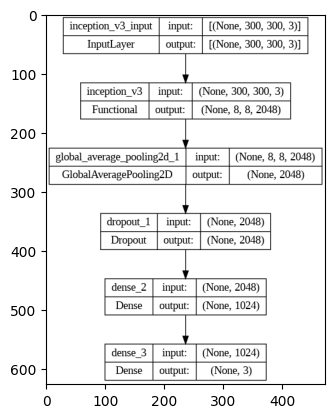

In [27]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the image
img = plt.imread('model_plot.png')
plt.imshow(img)
plt.show()


# ⚙️ Model Building


In [28]:
# Setting variables for the model
batch_size = 32
epochs = 10

# Seperating Training and Testing Data
train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]

In [29]:
# Calculating variables for the model
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

print("steps_per_epoch :", steps_per_epoch)
print("validation_steps :", validation_steps)

steps_per_epoch : 20
validation_steps : 2


# ⚙️ Model Training


In [30]:
# File Path to store the trained models
filepath = "./model_{epoch:02d}-{val_accuracy:.2f}.h5"

# Using the ModelCheckpoint function to train and store all the best models
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint1]
# Training the Model
history = model.fit_generator(generator=train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch,
                              validation_data=valid_generator, validation_steps=validation_steps,
                              callbacks=callbacks_list)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 1.1592 - accuracy: 0.3689
Epoch 1: val_accuracy improved from -inf to 0.65625, saving model to ./model_01-0.66.h5
20/20 [==============================] - 190s 9s/step - loss: 1.1592 - accuracy: 0.3689 - val_loss: 0.9504 - val_accuracy: 0.6562
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.9555 - accuracy: 0.5361
Epoch 2: val_accuracy did not improve from 0.65625
20/20 [==============================] - 178s 9s/step - loss: 0.9555 - accuracy: 0.5361 - val_loss: 0.9003 - val_accuracy: 0.6094
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.8414 - accuracy: 0.6443
Epoch 3: val_accuracy did not improve from 0.65625
20/20 [==============================] - 184s 9s/step - loss: 0.8414 - accuracy: 0.6443 - val_loss: 0.8646 - val_accuracy: 0.6250
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.7968 - accuracy: 0.6443
Epoch 4: val_accuracy did not improve from 0

### Model still improving, train for more epochs for better results !!!

# ⚙️ Model Evaluation


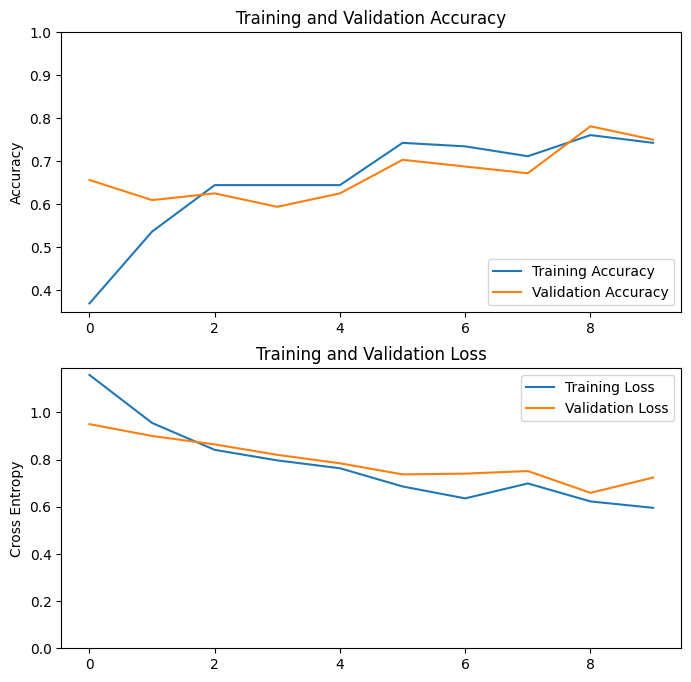

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 -------------------------

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# ________________ Graph 2 -------------------------

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [33]:
# Calculate the Loss and Accuracy on the Validation Data
test_loss, test_acc = model.evaluate(valid_generator)
print('test accuracy : ', test_acc)

3/3 [==============================] - 16s 4s/step - loss: 0.7379 - accuracy: 0.7391
test accuracy :  0.739130437374115


In [46]:
# Check our folder and import the model with best validation accuracy
loaded_best_model = keras.models.load_model("model_08-0.80.h5")

# Custom function to load and predict label for the image
def predict(img_rel_path):
    # Import Image from the path with size of (300, 300)
    img = image.load_img(img_rel_path, target_size=(300, 300))

    # Convert Image to a numpy array
    img = image.img_to_array(img, dtype=np.uint8)

    # Scaling the Image Array values between 0 and 1
    img = np.array(img)/255.0

    # Plotting the Loaded Image
    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    # Get the Predicted Label for the loaded Image
    p = loaded_best_model.predict(img[np.newaxis, ...])

    # Label array
    labels = {0: 'adidas', 1: 'converse', 2: 'nike'}

    print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print("Classified:", predicted_class, "\n\n")

    classes=[]
    prob=[]
    print("\n-------------------Individual Probability--------------------------------\n")

    for i,j in enumerate (p[0],0):
        print(labels[i].upper(),':',round(j*100,2),'%')
        classes.append(labels[i])
        prob.append(round(j*100,2))

    def plot_bar_x():
        # this is for plotting purpose
        index = np.arange(len(classes))
        plt.bar(index, prob)
        plt.xlabel('Labels', fontsize=8)
        plt.ylabel('Probability', fontsize=8)
        plt.xticks(index, classes, fontsize=8, rotation=20)
        plt.title('Probability for loaded image')
        plt.show()
    plot_bar_x()

# ⚙️ Model Testing With Graphs


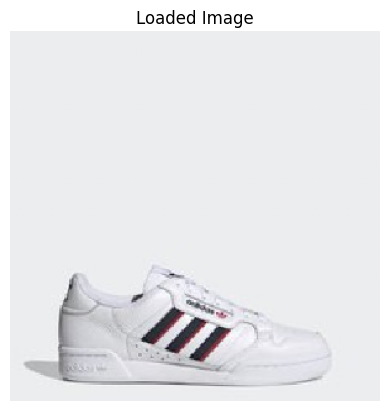

1/1 [==============================] - 2s 2s/step


Maximum Probability:  0.8017217
Classified: adidas 



-------------------Individual Probability--------------------------------

ADIDAS : 80.17 %
CONVERSE : 8.19 %
NIKE : 11.64 %


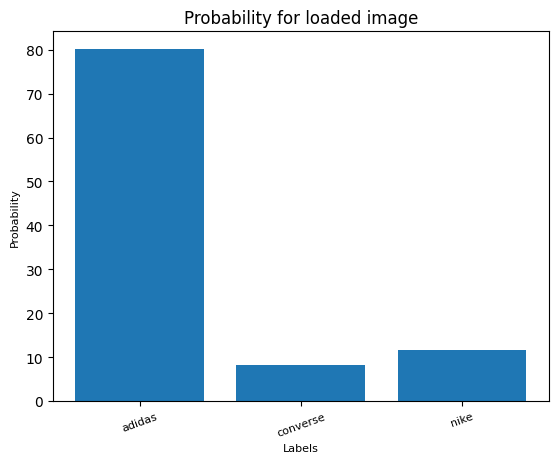

In [47]:
predict("../input/nike-adidas-shoes-for-image-classification-dataset/validation/adidas/adidas_ (149).jpg")

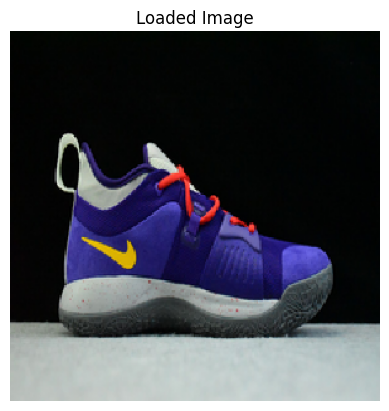

1/1 [==============================] - 0s 440ms/step


Maximum Probability:  0.5729559
Classified: nike 



-------------------Individual Probability--------------------------------

ADIDAS : 32.28 %
CONVERSE : 10.43 %
NIKE : 57.3 %


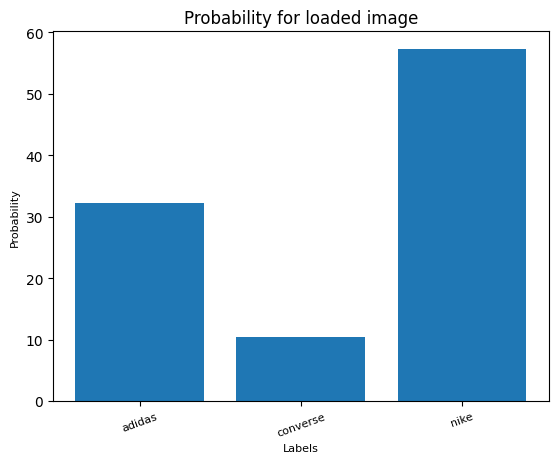

In [48]:
predict("../input/nike-adidas-shoes-for-image-classification-dataset/validation/nike/Image_261.jpg")

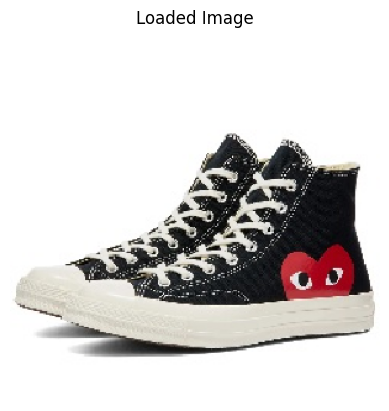

1/1 [==============================] - 0s 260ms/step


Maximum Probability:  0.65391225
Classified: converse 



-------------------Individual Probability--------------------------------

ADIDAS : 22.59 %
CONVERSE : 65.39 %
NIKE : 12.02 %


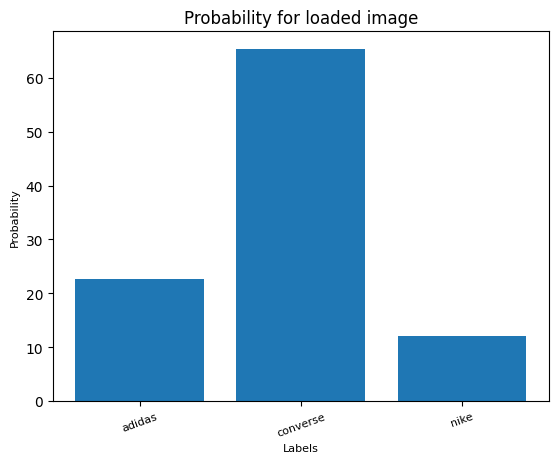

In [49]:
predict("../input/nike-adidas-and-converse-imaged/test/converse/31.jpg")

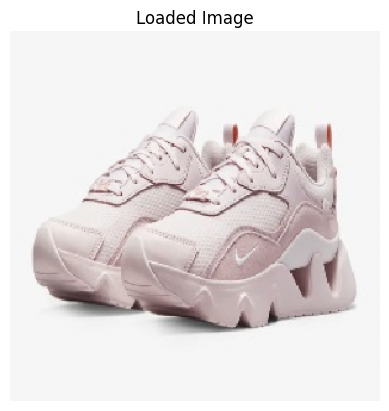

1/1 [==============================] - 0s 256ms/step


Maximum Probability:  0.46156552
Classified: adidas 



-------------------Individual Probability--------------------------------

ADIDAS : 46.16 %
CONVERSE : 19.64 %
NIKE : 34.21 %


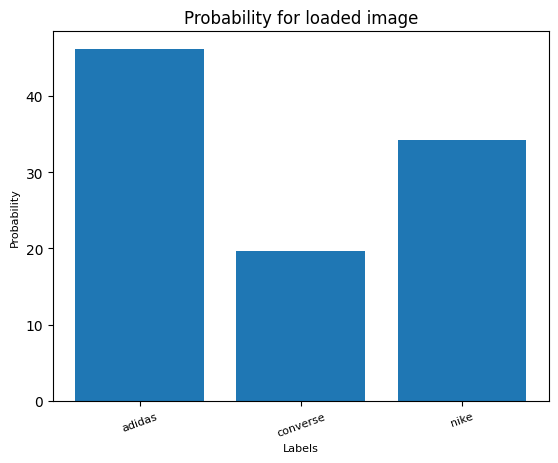

In [50]:
predict("../input/nike-adidas-and-converse-imaged/test/nike/31.jpg")

# Thank You

**I will be creating one more notebook showing how to use our model interactively by creating a ML web-app**

**Please feel free to follow me on Kaggle and upvote this Notebook if you found it useful : )**

**📕📕📕 Happy Learning !!! 📕📕📕**